##### DBSCAN算法  (任意形状的簇)
1. 无需预设簇数，可处理任意形状簇和噪声。
2. 对参数 ε 和 MinPts 敏感，高维数据效果可能下降
DBSCAN（Density-Based Spatial Clustering of Applications with Noise）是一种基于密度的聚类算法，能够发现任意形状的簇并有效识别噪声点。以下是其核心流程：

**1. 参数设置**
- **邻域半径（ε）**：定义点的邻域范围。
- **最小样本数（MinPts）**：判定核心点的邻域内需包含的最少点数。

**2. 核心概念定义**
- **核心点（Core Point）**：若某点的 ε 邻域内至少有 `MinPts` 个点（包括自身），则为核心点。
- **边界点（Border Point）**：非核心点，但位于某个核心点的 ε 邻域内。
- **噪声点（Noise Point）**：既非核心点，也不属于任何核心点邻域的点。

**3. 算法流程**
**初始化**  
   所有点标记为 **未访问（unvisited）**。
**遍历所有点**  
   对每个未访问的点 `p`，执行以下操作：
   - **标记为已访问**。
   - **计算 ε 邻域内的点数**，记为 `Nε(p)`。
**判断核心点**  
   - 若 `|Nε(p)| ≥ MinPts`：
     - 创建一个新簇 `C`，将 `p` 加入 `C`。
     - **扩展簇**：递归地将 `p` 的 ε 邻域内所有 **未访问点** 加入 `C`，并重复判断这些点是否为核心点以继续扩展。
   - 若 `|Nε(p)| < MinPts`：
     - 暂时标记 `p` 为 **噪声点**（后续可能被其他簇吸收为边界点）。
**终止条件**  
   重复步骤 2-3，直到所有点被访问。
**噪声点处理**  
   所有未被任何簇包含的点最终标记为噪声。



 **4. 关键机制**
- **密度直达（Directly Density-Reachable）**：若 `q` 在 `p` 的 ε 邻域内且 `p` 是核心点，则 `q` 从 `p` 密度直达。
- **密度可达（Density-Reachable）**：通过一系列密度直达关系连接的点。
- **密度相连（Density-Connected）**：若存在点 `o`，使得 `p` 和 `q` 都从 `o` 密度可达，则 `p` 和 `q` 密度相连。




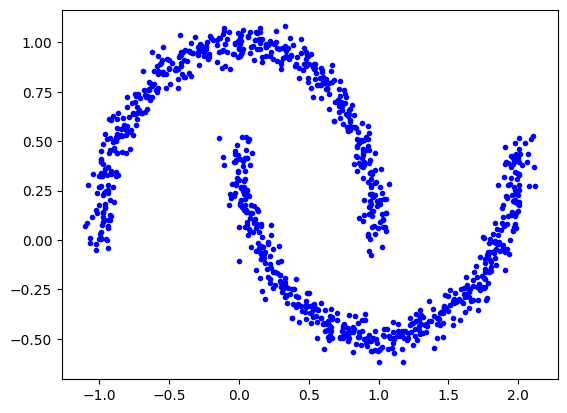

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 创建聚类数据集(形状成环)
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000,noise = 0.05, random_state=42)
plt.plot(X[:,0],X[:,1],'b.')

In [10]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.05 , min_samples = 5 )
dbscan.fit(X)

DBSCAN(eps=0.05)

In [ ]:
dbscan.labels_[:10] # 聚类标签 -1 表示离群点

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [ ]:
dbscan.core_sample_indices_[:10]  # 核心对象的索引

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [13]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [14]:
dbscan2 = DBSCAN(eps = 0.2 , min_samples = 5 )
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [15]:
np.unique(dbscan2.labels_)

array([0, 1])